In [2]:
import tensorflow as tf
from keras import layers

import numpy as np                                                                                                                                                     
import matplotlib.pyplot as plt

2022-12-23 12:55:24.267507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-23 12:55:24.487648: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-23 12:55:24.546804: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-23 12:55:25.339473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [3]:
def ColorDetection():
    input = tf.keras.Input(shape = (28, 28, 3))
    
    rs = layers.Rescaling(1.0/255)(input)
    
    c  = layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same")(input)
    mp = layers.MaxPooling2D((2, 2), padding = "same")(c)
    
    fl = layers.Flatten()(mp)
    
    h1 = layers.Dense(1000, activation = 'relu')(fl)
    
    h2 = layers.Dense(1000, activation = 'relu')(h1)
    
    output = layers.Dense(6, activation = 'softmax')(h2)
    
    ColorDetectionNet = tf.keras.Model(input, output, name = "RandomChoiceNet")
    
    return ColorDetectionNet

ColorDetectionNet = ColorDetection()

2022-12-23 12:55:26.738227: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 12:55:26.835247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 12:55:26.835392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 12:55:26.835951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [4]:
ColorDetectionNet.summary()

Model: "RandomChoiceNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 1000)              6273000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                   

In [5]:
# Load Dataset

import pathlib

dataset_url = "/home/tinozg/Documents/AI/Finale/ColorDataset"
data_dir = pathlib.Path(dataset_url)

batch_size = 100
img_height = 28
img_width = 28



In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 23,
  image_size = (img_height, img_width),
  batch_size = batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 23,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 150 files belonging to 6 classes.
Using 120 files for training.
Found 150 files belonging to 6 classes.
Using 30 files for validation.


In [7]:
colors = train_ds.class_names
print(colors)

['blue', 'green', 'orange', 'red', 'white', 'yellow']


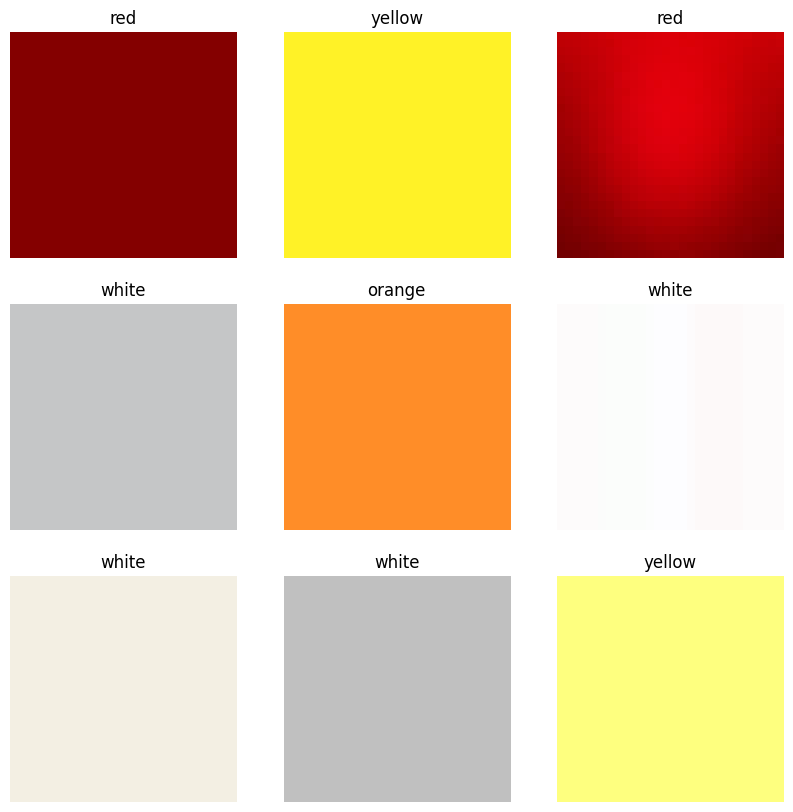

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(colors[labels[i]])
    plt.axis("off")

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from IPython.display import clear_output

class DisplayCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait = True)

callbacks = [DisplayCallback(), 
            EarlyStopping(patience = 150, verbose = 1),
            ReduceLROnPlateau(patience = 3, verbose = 1),
            ModelCheckpoint('ColorDetectionNet.h5', verbose = 1, save_best_only = True)]

In [10]:
ColorDetectionNet.compile(optimizer='adam',
                          loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                          metrics=['accuracy'])

In [11]:
history = ColorDetectionNet.fit(
          train_ds,
          validation_data = val_ds,
          epochs = 100,
          callbacks = callbacks
        )


Epoch 100: val_loss did not improve from 0.00000
2/2 [==============================] - 0s 18ms/step - loss: 0.2905 - accuracy: 0.9833 - val_loss: 1.8080 - val_accuracy: 0.9667 - lr: 1.0000e-30


1/1 [==============================] - 0s 14ms/step
Predict: blue


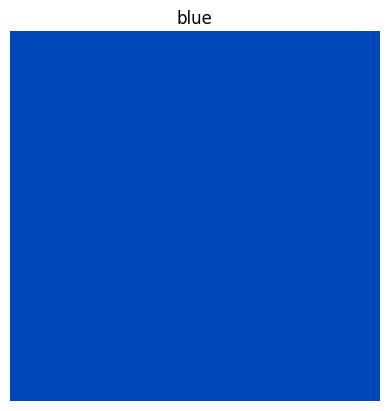

In [78]:
for images, labels in val_ds.take(1):
  
  plt.imshow(images[1].numpy().astype("uint8"))
  plt.title(colors[labels[1]])
  plt.axis("off")
  
  img = np.expand_dims(images[1], axis = 0)
  
  print('Predict:',colors[np.argmax(ColorDetectionNet.predict(img))])

1/1 [==============================] - 0s 14ms/step


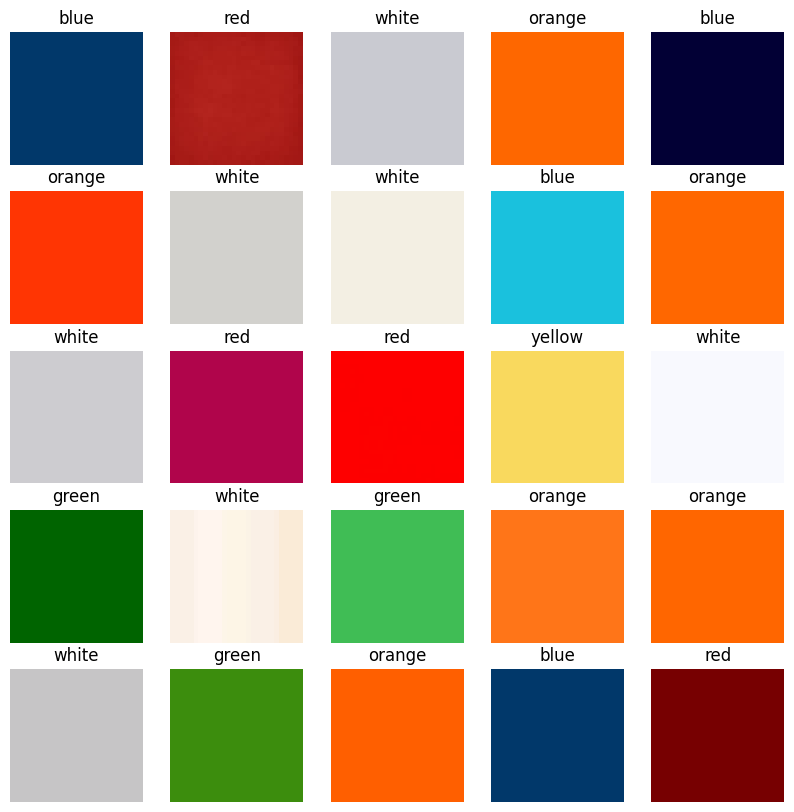

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    img = np.expand_dims(images[i], axis = 0)
    plt.title(colors[np.argmax(ColorDetectionNet.predict(img))])
    plt.axis("off")